In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos informados por el Ministerios de Ciencia

In [8]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url)

In [9]:
data.head()

,Fecha,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21
0,Casos nuevos,0,2,1,1,2,3,5,2,6,...,286,312,392,356,534,445,478,358,419,325
1,Casos totales,1,3,4,5,7,10,15,17,23,...,7213,7525,7917,8273,8807,9252,9730,10088,10507,10832
2,Casos recuperados,0,0,0,0,0,0,0,0,0,...,2059,2367,2646,2937,3299,3621,4035,4338,4676,4969
3,Fallecidos,0,0,0,0,0,0,0,0,0,...,80,82,92,94,105,116,126,133,139,147
4,Casos activos,1,3,4,5,7,10,15,17,23,...,5074,5076,5179,5242,5403,5515,5569,5617,5692,5716


In [10]:
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21
0,Casos nuevos,0,2,1,1,2,3,5,2,6,...,286,312,392,356,534,445,478,358,419,325
1,Casos totales,1,3,4,5,7,10,15,17,23,...,7213,7525,7917,8273,8807,9252,9730,10088,10507,10832
2,Casos recuperados,0,0,0,0,0,0,0,0,0,...,2059,2367,2646,2937,3299,3621,4035,4338,4676,4969
3,Fallecidos,0,0,0,0,0,0,0,0,0,...,80,82,92,94,105,116,126,133,139,147
4,Casos activos,1,3,4,5,7,10,15,17,23,...,5074,5076,5179,5242,5403,5515,5569,5617,5692,5716


In [11]:
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    plt.xticks(X, rotation='vertical')
    plt.show()

## Grafico de casos totales

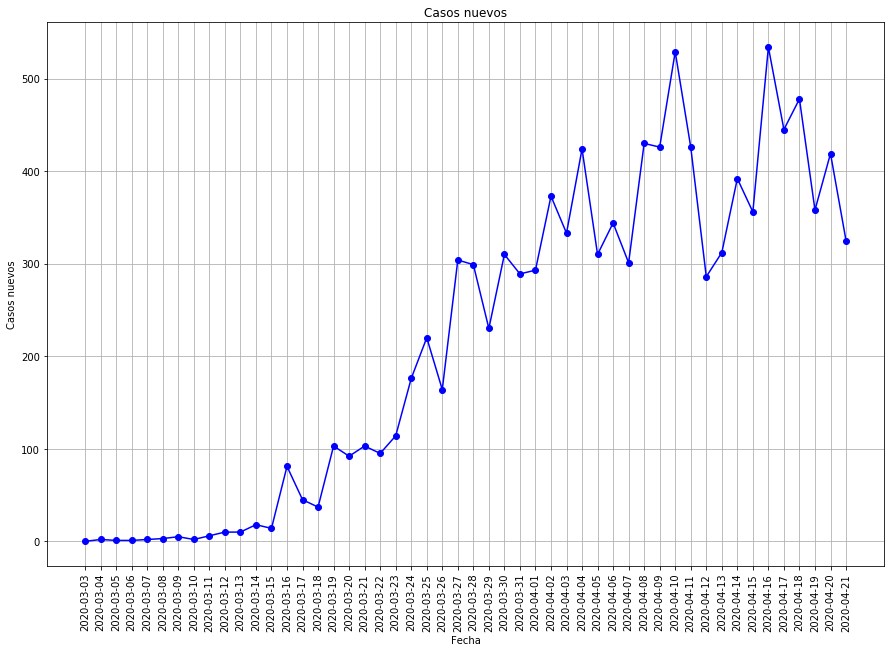

In [12]:
Graph("Casos nuevos")

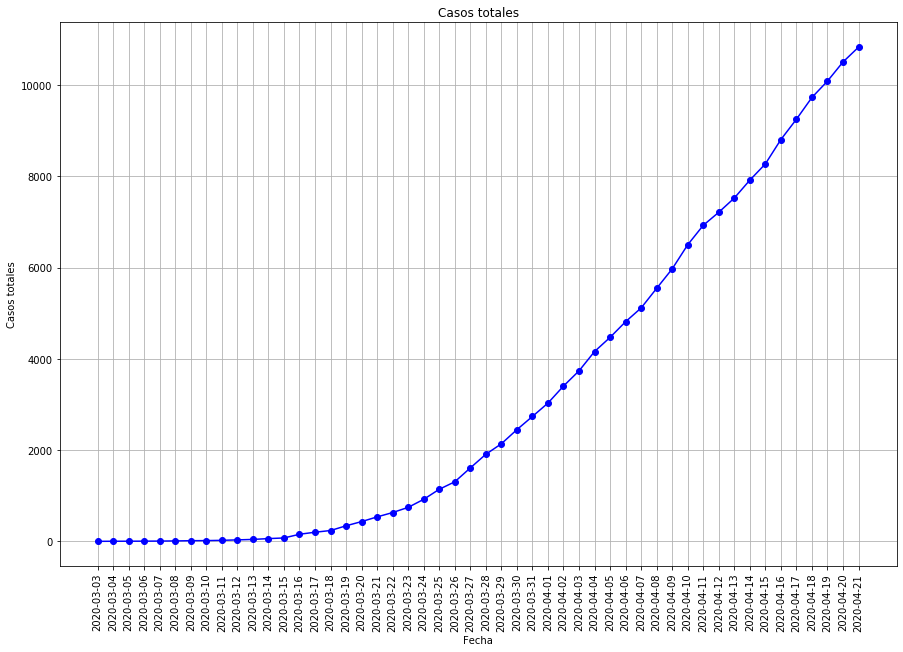

In [13]:
Graph("Casos totales")

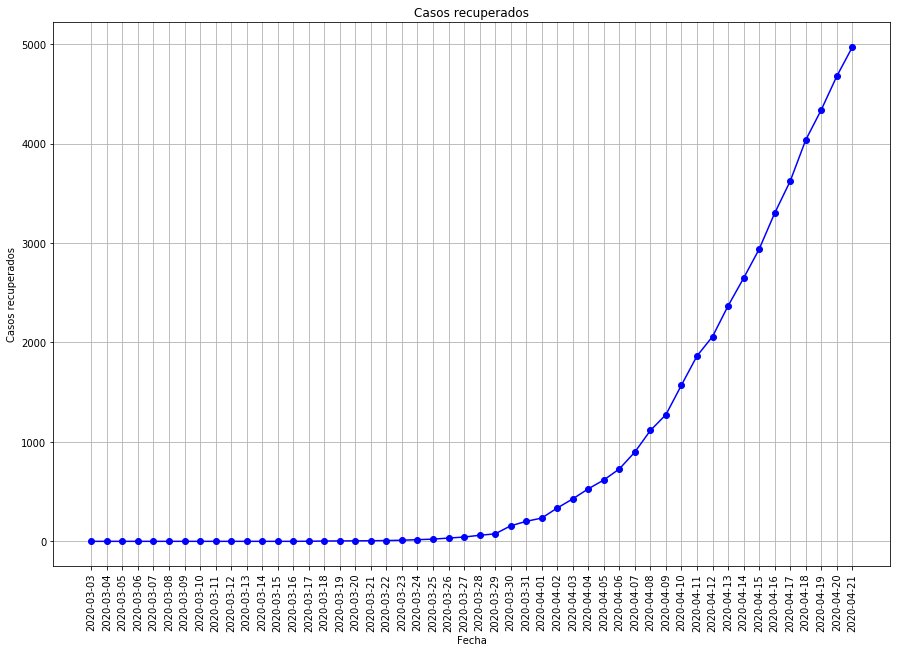

In [14]:
Graph("Casos recuperados")

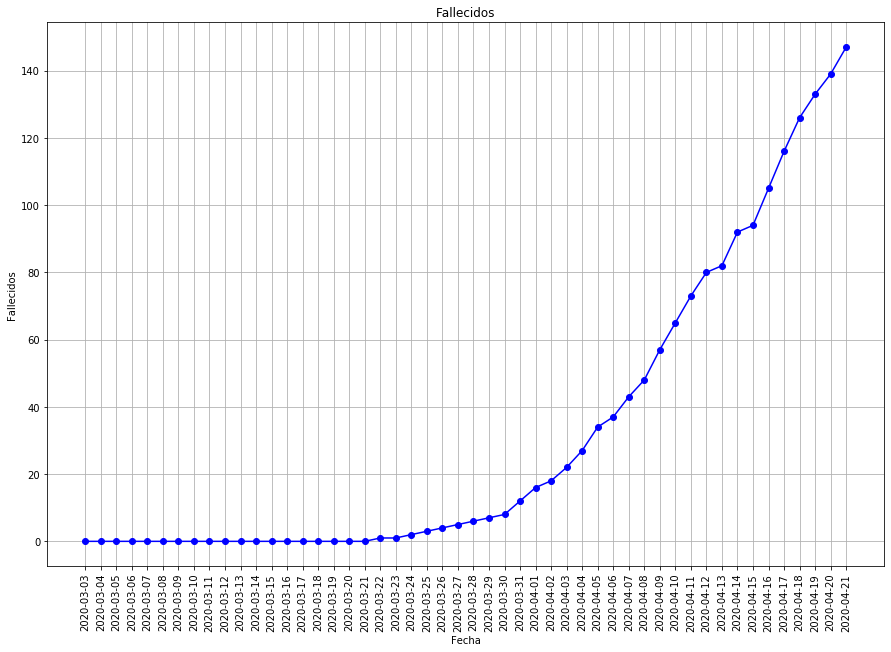

In [15]:
Graph("Fallecidos")

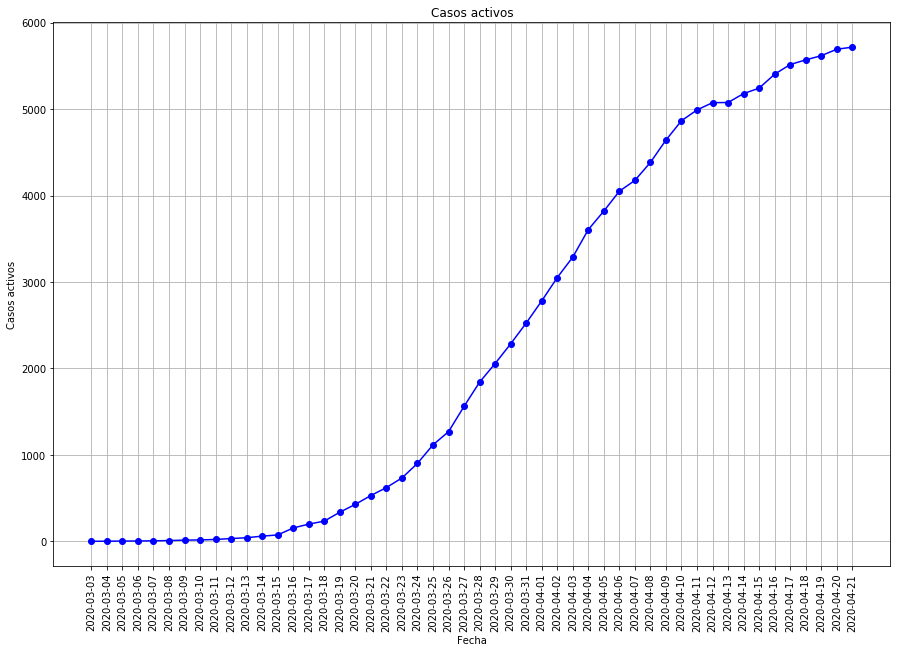

In [16]:
Graph("Casos activos")